Gede Indra Adi Brata - 225150200111006

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def som(X, lrate, b, max_epoch, n_cluster) :
  centroids = np.random.uniform(size=(n_cluster, len(X[0])))
  epoch = 0
  labels = []

  while epoch < max_epoch :
    for x in X :
        distances = [sum((x - centroid) ** 2) for centroid in centroids] # Isi bagian ini
        min_idx = np.argmin(distances) # Isi bagian ini
        centroids[min_idx] += lrate * (x - centroids[min_idx]) # Isi bagian ini
    lrate *= b
    epoch += 1

  for x in X :
    distances = [sum((x - centroid) ** 2) for centroid in centroids] # isi bagian ini
    min_idx = np.argmin(distances) # isi bagian ini

    labels.append(min_idx)

  return centroids, labels

In [4]:
def draw(X, target, centroids) :
  colors = 'rgbcmyk'

  for x, label in zip(X, target) :
    plt.plot(x[0], x[1], colors[label] + '.')

  plt.plot(centroids[:, 0], centroids[:, 1], 'kx')

Silhouette score: 0.8408836367683911


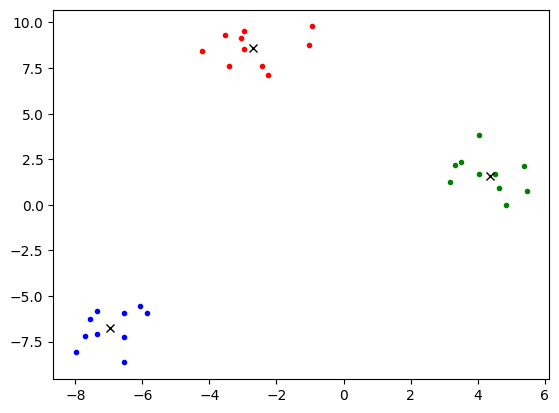

In [5]:
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, target = make_blobs(n_samples=30, n_features=2, centers=3, random_state=42)
centroids, labels = som(X, lrate=.5, b=.5, max_epoch=100, n_cluster=3)
silhouette = silhouette_score(X, labels)

print('Silhouette score:', silhouette)
draw(X, target, centroids)

Praktikum Question : 
1. Jelaskan syarat pemberhentian algoritma yang mungkin diimplementasikan selain jumlah epoch
2. Mengapa silhouette score yang mendekati angka 1 diinterpretasikan sebagai nilai yang baik?
3. Modifikasi kode untuk dapat mengetahui jumlah klaster terbaik

1. Dalam algoritma pembelajaran mesin, khususnya dalam konteks Self-Organizing Map (SOM), ada beberapa syarat pemberhentian (stopping criteria) yang bisa diimplementasikan selain jumlah epoch. Berikut adalah beberapa di antaranya:

- Konvergensi Error:

  - Algoritma dapat dihentikan ketika error atau perubahan dalam error antara iterasi berturut-turut berada di bawah ambang batas tertentu. Misalnya, jika perbedaan error antara dua iterasi kurang dari nilai epsilon (ε), maka algoritma dianggap telah konvergen.
- Stabilitas Peta:

  - Algoritma dapat dihentikan ketika peta (map) tidak mengalami perubahan signifikan selama beberapa iterasi. Ini bisa diukur dengan memantau perubahan posisi neuron atau perubahan bobot.
- Jumlah Iterasi Tanpa Perubahan Signifikan:

  - Algoritma dapat dihentikan jika tidak ada perubahan signifikan dalam bobot atau posisi neuron selama sejumlah iterasi berturut-turut.
- Validasi Kinerja:

  - Menggunakan set data validasi, algoritma dapat dihentikan ketika kinerja pada data validasi tidak menunjukkan peningkatan setelah sejumlah iterasi tertentu.
- Waktu Eksekusi:

  - Algoritma dapat dihentikan setelah mencapai batas waktu eksekusi tertentu, yang berguna dalam aplikasi real-time atau ketika sumber daya komputasi terbatas.

2. Silhouette score adalah metrik yang digunakan untuk mengukur seberapa baik objek dalam sebuah cluster dikelompokkan. Nilai silhouette score berkisar antara -1 dan 1. Singkatnya, Silhouette score mengukur seberapa dekat suatu sampel data dengan kluster yang ditetapkan.

- Definisi Silhouette Score:

  - Silhouette score mengukur seberapa mirip suatu objek dengan cluster-nya sendiri (koherensi) dibandingkan dengan cluster lain (separasi).
  - Dihitung dengan rumus:  s(i) = (b(i) - a(i))/max(a(i), b(i)) di mana:
    - (a(i)) adalah jarak rata-rata antara objek (i) dan semua objek lain dalam cluster yang sama.
    - (b(i)) adalah jarak rata-rata antara objek (i) dan semua objek dalam cluster terdekat yang berbeda.
- Interpretasi Nilai Silhouette Score:
  - Nilai mendekati 1: Objek sangat cocok dengan cluster-nya sendiri dan tidak cocok dengan cluster lain. Ini menunjukkan bahwa cluster tersebut kompak dan terpisah dengan baik dari cluster lain.
  - Nilai mendekati 0: Objek berada di batas antara dua cluster. Ini menunjukkan bahwa objek tersebut hampir sama jauhnya dari cluster-nya sendiri dan cluster terdekat lainnya.
  - Nilai mendekati -1: Objek mungkin lebih cocok berada di cluster lain. Ini menunjukkan bahwa objek tersebut salah pengelompokan.
- Mengapa Nilai Mendekati 1 Dianggap Baik:
  - Koherensi Tinggi: Objek dalam cluster sangat mirip satu sama lain, menunjukkan bahwa cluster tersebut kompak. 
  - Separasi Tinggi: Cluster terpisah dengan baik dari cluster lain, menunjukkan bahwa cluster tersebut berbeda secara signifikan dari cluster lain.
  - Kualitas Clustering: Nilai silhouette score yang tinggi menunjukkan bahwa algoritma clustering berhasil mengelompokkan data dengan baik, menghasilkan cluster yang jelas dan terdefinisi dengan baik.

3. Berikut adalah hasil modifikasi kode untuk mendapatkan jumlah kluster terbaik.

Best number of clusters: 3
Best silhouette score: 0.8408836367683911


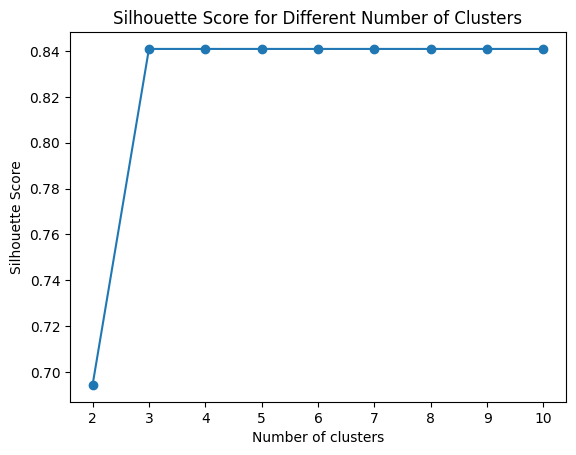

In [6]:
best_n_clusters = 0
best_silhouette = -1
silhouette_scores = []

for n_clusters in range(2, 11):
  centroids, labels = som(X, lrate=.5, b=.5, max_epoch=100, n_cluster=n_clusters)
  silhouette = silhouette_score(X, labels)
  silhouette_scores.append(silhouette)
  
  if silhouette > best_silhouette:
    best_silhouette = silhouette
    best_n_clusters = n_clusters

print(f'Best number of clusters: {best_n_clusters}')
print(f'Best silhouette score: {best_silhouette}')

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Number of Clusters')
plt.show()

Kode di atas membantu dalam menentukan jumlah klaster optimal untuk data X dengan menggunakan metode SOM dan mengevaluasi hasil klasterisasi menggunakan Silhouette Score. Plot yang dihasilkan memberikan visualisasi bagaimana Silhouette Score berubah dengan jumlah klaster yang berbeda. Pada kode di atas, saya memeberikan rentang kluster dari 2 hingga 10.


Kode ini bekerja dengan mencoba berbagai jumlah klaster (dari 2 hingga 10) untuk menemukan jumlah klaster terbaik berdasarkan silhouette score. Pertama, untuk setiap nilai klaster n_clusters, algoritma Self-Organizing Map (SOM) dijalankan untuk menghasilkan centroid dan label klaster untuk setiap data pada input X. Setelah itu, silhouette score dihitung untuk mengukur seberapa baik data telah dikelompokkan.

Skor ini disimpan dalam daftar silhouette_scores, dan jika skor tersebut lebih tinggi dari silhouette score terbaik yang ditemukan sejauh ini, maka skor tersebut disimpan dalam variabel best_silhouette dan jumlah klaster yang sesuai disimpan dalam variabel best_n_clusters.

Setelah perulangan selesai, jumlah klaster terbaik serta silhouette score terbaik dicetak. Terakhir, grafik yang menunjukkan hubungan antara jumlah klaster dan silhouette score ditampilkan, memungkinkan kita untuk melihat bagaimana kualitas klasterisasi berubah dengan jumlah klaster yang berbeda.






